In [1]:
from numpy import *
from os import listdir
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np1
import numpy.linalg as np
import seaborn as sn
from scipy.stats.stats import pearsonr

In [2]:
data = sn.load_dataset('tips')

In [3]:
def kernel(point,xmat, k):
    m,n = np1.shape(xmat)
    weights = np1.mat(np1.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np1.exp(diff*diff.T/(-2.0*k**2))
    return weights


def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

def localWeightRegression(xmat,ymat,k):
    m,n = np1.shape(xmat)
    ypred = np1.zeros(m)
    
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

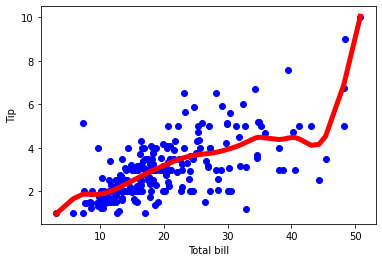

In [4]:
#load data points

bill = np1.array(data.total_bill)
tip = np1.array(data.tip)
#preparing and add 1 in bill
mbill = np1.mat(bill)
mtip = np1.mat(tip)
# mat is used to convert to n dimesiona to 2 dimensional array form
m= np1.shape(mbill)[1] # print(m) 244 data is stored in m
one = np1.mat(np1.ones(m))
X= np1.hstack((one.T,mbill.T)) # create a stack of bill from ONE
# print(X)
#set k here
ypred = localWeightRegression(X,mtip,2)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='blue')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show();


In [5]:
!pip install scikit-lego
import numpy as np
import matplotlib.pylab as plt
from sklego.linear_model import LowessRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 224 kB 5.1 MB/s 
     |████████████████████████████████| 88 kB 8.3 MB/s 
     |████████████████████████████████| 1.1 MB 52.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=c30dc2109025f3a159e9f007603def2902aba5eab7566625a5b2970cb122e99e
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=b4e3c9a446075f98d27898709b52ea6c3cdcedcc9cc41454b13ed6aea685ee98
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


R2 score:  0.7091565367705791


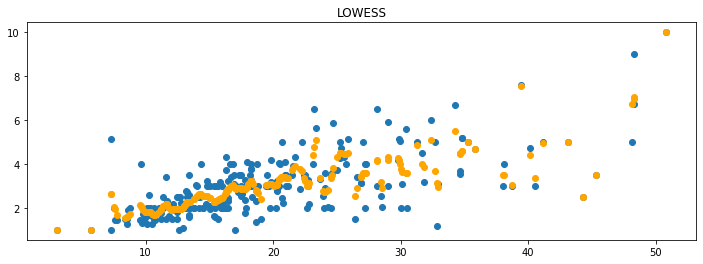

In [6]:
X = data.iloc[:,[0]].values
y = data['tip'].values
sigma=0.1   #@param {type:"number"}
span=0.9    #@param {type:"number"}

mod = LowessRegression(sigma=sigma, span=span).fit(X, y)
preds = mod.predict(X)

plt.figure(figsize=(12, 4))
plt.scatter(X, y)
plt.scatter(X, preds, color='orange')
plt.title("LOWESS")
print("R2 score: ",  r2_score(y,preds))